In [1]:
import librosa
import numpy as np
import keras
from keras import models
from keras import layers
import kapre
from kapre import time_frequency
import matplotlib.pyplot as plt

sample_rate = 44100

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load the sample we would love to feed into the NN.

In [2]:
samples, _ = librosa.core.load("Kaffe Creme.wav", sample_rate)

# Bruteforce - go fully-connected.

In [3]:
model = models.Sequential()

model.add(layers.Dense(512, activation="relu", input_shape=(1024,)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,754
Trainable params: 591,754
Non-trainable params: 0
_________________________________________________________________


In [6]:
samples_for_prediction = samples
samples_for_prediction = samples_for_prediction[:1024]
samples_for_prediction = np.expand_dims(samples_for_prediction, axis=0)

prediction = model.predict(samples_for_prediction)[0]
print(prediction)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


# Be brave - use feature extraction.

In [7]:
model = models.Sequential()

model.add(layers.Reshape((1, 4096), input_shape=(4096,)))
model.add(time_frequency.Melspectrogram(n_mels=128, fmax=1000, n_hop=64))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1, 4096)           0         
_________________________________________________________________
melspectrogram_1 (Melspectro (None, 128, 64, 1)        296064    
Total params: 296,064
Trainable params: 0
Non-trainable params: 296,064
_________________________________________________________________


/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/librosa/filters.py:271: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [8]:
samples_for_prediction = samples
samples_for_prediction = samples_for_prediction[4096:2 * 4096]
samples_for_prediction = np.expand_dims(samples_for_prediction, axis=0)

prediction = model.predict(samples_for_prediction)[0]
print(prediction)

[[[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.02889846]
  [0.02227931]
  [0.01156965]
  ...
  [0.00579502]
  [0.00631864]
  [0.00670643]]

 [[0.05410312]
  [0.04171089]
  [0.02166048]
  ...
  [0.01084932]
  [0.01182963]
  [0.01255565]]]


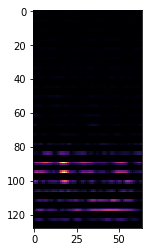

In [9]:
image = np.reshape(prediction, (128, 64))
image = np.flip(image, axis=0)
plt.imshow(image, cmap="magma")